blocks 0 {'name': 'mmp5', 'pin': [{'contact': [[5208, 8872, 5672, 8936]], 'name': 'D'}, {'contact': [[5208, 10384, 5672, 10448]], 'name': 'G'}, {'contact': [[5720, 8664, 5800, 11664]], 'name': 'S'}], 'position': [4640, 8568, 5920, 12264]}
vip_o
[[6880, 6552, 7520, 6552], [7520, 6552, 7520, 12936], [7520, 12936, 10400, 12936], [10400, 12936, 10400, 12936], [10400, 14280, 10400, 16632], [10400, 16632, 10080, 16632], [10080, 16632, 10080, 16632], [10080, 17976, 10080, 17976], [10080, 17976, 11840, 17976], [11840, 18186, 11840, 17766], [11840, 17976, 11840, 17976]]
vin_o
[[13760, 6552, 12960, 6552], [12960, 6552, 12960, 13104], [12960, 13104, 10240, 13104], [10240, 13104, 10240, 13104], [10240, 14112, 10240, 14448], [10280, 14448, 9880, 14448], [9920, 14448, 9920, 16464], [9920, 17640, 9920, 17640], [9920, 17640, 8640, 17640], [8640, 17598, 8640, 18018], [8640, 17976, 8640, 17976]]


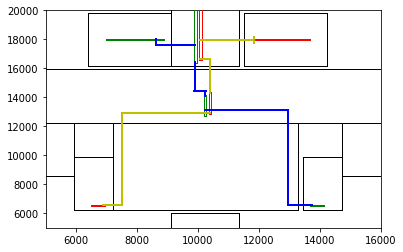

In [68]:
import json
import matplotlib.pyplot as plt

def read_data(filename):
    read_file = filename
    data = json.load(open(read_file,'r'))
    Blocks = data["blocks"]
    Path = data["wires"]
    
    return Blocks,Path

def plot_detail_routing(Blocks,Path,name1,name2):
    
    plt.figure()
    
    #plot_box(node_box['LLx'], node_box['LLy'],node_box['URx'],node_box['URy'],'r')
    
    for block in Blocks:
        
        plot_box(block["position"][0],block["position"][1],block["position"][2],block["position"][3],'k',3)        
    
    index = 1
    for net in Path:
    
        if net['name']!=name1 and net['name']!=name2:
            continue
     
        print(net['name'])
        print(net['path'])
        
        for path in net['path']:
            if index==1:
                c = 'y'
            else:
                c = 'b'
            plot_line(path[0],path[1],path[2],path[3],c,5)
            #pass

        for connected in net["connection"]:
            contacts = Blocks[connected[0]]["pin"][connected[1]]["contact"]
            for contact in contacts:
              llx = contact[0]
              lly = contact[1]
              urx = contact[2]
              ury = contact[3]
              if index==1:
                c = 'r'
              else:
                c = 'g'
              plot_box(llx,lly,urx,ury,c,4)
            
        index=index+1
        #for stiner_node in net['steiner_node']:
            #plot_dot(stiner_node['x'],stiner_node['y'],'g')
    plt.xlim((5000, 16000))
    plt.ylim((5000, 20000))
    plt.savefig("sym_routing", dpi=300)
    
    plt.show()
    
def plot_box(llx,lly,urx,ury,c,zorder):
    plt.plot([llx,urx], [lly,lly], lw=1, color=c, zorder=zorder)
    plt.plot([urx,urx], [lly,ury], lw=1, color=c, zorder=zorder)
    plt.plot([urx,llx], [ury,ury], lw=1, color=c, zorder=zorder)
    plt.plot([llx,llx], [lly,ury], lw=1, color=c, zorder=zorder)
    
def plot_line(llx,lly,urx,ury,c,zorder):
    plt.plot([llx,urx], [lly,ury], lw=2, color=c, zorder=zorder)
    
def plot_dot(x,y,c,zorder):
    plt.plot(x,y, 'o', color=c, zorder=zorder)


#Blocks,Path=read_data("Results/switched_capacitor_filter_DetailRoute_0.json")
#print(Path)
Blocks,Path=read_data("high_speed_comparator_DetailRoute_0.json")

print('blocks 0',Blocks[0])


plot_detail_routing(Blocks,Path,"vip_o","vin_o")


